In [2]:
import requests
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [3]:
img = Image.open(r"C:\Users\sathi\Downloads\Dinesh_IBM_FInal\IBM\FINAL DELIVERABLES\FINAL CODE\sample\0.jpg").convert("L")  
img = img.resize((28, 28))  
img_arr = np.array(img)  
img_arr = img_arr.reshape(1, 28, 28, 1) 

img = Image.open(r"C:\Users\sathi\Downloads\Dinesh_IBM_FInal\IBM\FINAL DELIVERABLES\FINAL CODE\sample\\1.jpg").convert("L")  
img = img.resize((28, 28))  
img2_arr = np.array(img)  
img2_arr = img2_arr.reshape(1, 28, 28, 1) 

In [44]:
API_KEY = "sChLJQZr4O1qPT1FJmTt_17kjdbbofyoAipv-mCFWnD_" 

token_response = requests.post('https://iam.cloud.ibm.com/identity/token', 
                               data={"apikey": API_KEY, "grant_type": 'urn:ibm:params:oauth:grant-type:apikey'})

mltoken = token_response.json()["access_token"]

header = {'Content-Type': 'application/json', 'Authorization': 'Bearer ' + mltoken}

payload_scoring = {"input_data": [{"fields": [], "values": [img_arr.tolist(), img2_arr.tolist()]}]}

response_scoring = requests.post('https://us-south.ml.cloud.ibm.com/ml/v4/deployments/b266eba3-c550-4752-90db-0aac600ff447/predictions?version=2022-11-19', 
                                 json=payload_scoring, headers={'Authorization': 'Bearer ' + mltoken})

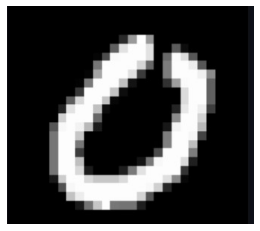

Result:  0


In [8]:
plt.imshow(plt.imread(r"C:\Users\sathi\Downloads\Dinesh_IBM_FInal\IBM\FINAL DELIVERABLES\FINAL CODE\sample\0.jpg"))
plt.axis('off')
plt.show()
print("Result: ",response_scoring.json()['predictions'][0]['values'][0][1])

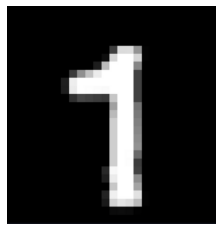

Result:  1


In [10]:
plt.imshow(plt.imread(r"C:\Users\sathi\Downloads\Dinesh_IBM_FInal\IBM\FINAL DELIVERABLES\FINAL CODE\sample\\1.jpg"))
plt.axis('off')
plt.show()
print("Result: ",response_scoring.json()['predictions'][0]['values'][1][1]))